<a href="https://colab.research.google.com/github/CeskKim/AI-Study/blob/main/prophet_coin_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#######################################################
# import set
#######################################################
import pyupbit
from pykrx import stock
from prophet import Prophet

In [27]:
#######################################################
# 소스 데이터
# 소스 : 업비트, 기준 : 시간, 기본 :200개
#######################################################
btc_upbit_df = pyupbit.get_ohlcv("KRW-BTC", interval = "minute60")
btc_upbit_df = btc_upbit_df.reset_index()
btc_upbit_df['ds'] = btc_upbit_df['index']
btc_upbit_df['y'] = btc_upbit_df['close']
btc_upbit_data = btc_upbit_df[['ds', 'y']]

,ds,y
195,2023-02-19 12:00:00,31925000.0
196,2023-02-19 13:00:00,31936000.0
197,2023-02-19 14:00:00,31952000.0
198,2023-02-19 15:00:00,31818000.0
199,2023-02-19 16:00:00,31889000.0


In [29]:
#######################################################
# 학습 데이터
# 모델 : prophet
#######################################################
ph_model = Prophet()
ph_model.fit(btc_upbit_data)

#######################################################
# 예측
# 기준 : 24시간
#######################################################
ph_future = ph_model.make_future_dataframe(periods=24, freq='H')
ph_forecast = ph_model.predict(ph_future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


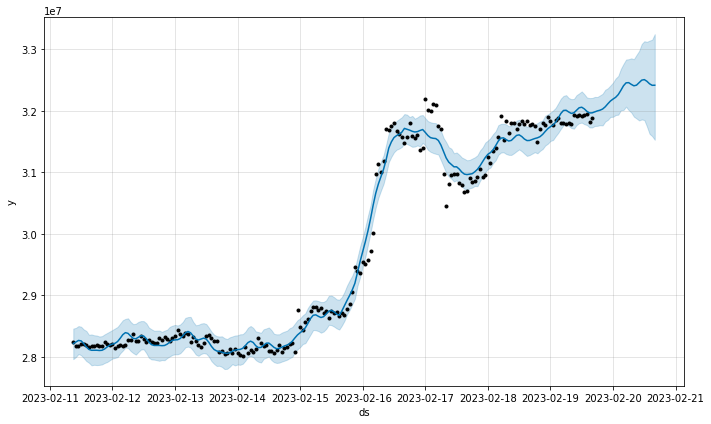

In [30]:
#######################################################
# 시각화
#######################################################
ph_fig = ph_model.plot(ph_forecast)